## Setup

In [220]:
!pip install  pandas

!pip install  emoji

!pip install leia-br

!pip install googletrans

!pip install textblob


In [221]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import emoji
import re

class_names = [
    "extremamente negativo",
    "negativo",
    "neutro",
    "positivo",
    "extremamente positivo",
]

# score | score_reanotado_gemini
score_column = "score_reanotado_gemini"

dataset_name = "3_dataset_reanotado_gemini_2_5_pro.csv"

## Manipulação dos dados

## Importação dos dados

In [222]:
df = pd.read_csv(dataset_name)

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   content                 3000 non-null   object
 1   score                   3000 non-null   int64 
 2   score_reanotado_gemini  3000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 70.4+ KB


In [223]:
# =================================
# Obter Sentimento
# =================================


def get_sentiment(rating):
    rating = int(rating)
    if rating == 1:
        return 0
    elif rating == 2:
        return 1
    elif rating == 3:
        return 2
    elif rating == 4:
        return 3
    else:
        return 4

In [224]:
# ======================
# Conversão de emojis
# ======================

# Exemplo de uso do emoji
print(
    emoji.demojize(
        "😍, 😂, 😘, 😡, ❤️, 👍, 👎, ⭐",
        language="pt",
    )
)


def converter_emojis(text):
    """
    Converte emojis em texto, garantindo que haja um espaço antes da descrição do emoji.
    """
    # Primeiro, converte o emoji para o formato :nome_do_emoji:
    text_demojized = emoji.demojize(text, language="pt")

    # A função lambda é aplicada a cada emoji encontrado pelo padrão r':([^:\s]+):'
    # m.group(1) captura apenas o nome do emoji (sem os dois pontos)
    # Em seguida, substitui '_' por ' ' e adiciona um espaço no início
    def replace_emoji(m):
        emoji_name = m.group(1)
        emoji_text = emoji_name.replace("_", " ")
        return f" {emoji_text}"

    # Usa re.sub para encontrar todos os padrões de emoji e aplicar a função de substituição
    text_final = re.sub(r":([^:\s]+):", replace_emoji, text_demojized)

    return text_final

:rosto_sorridente_com_olhos_de_coração:, :rosto_chorando_de_rir:, :rosto_mandando_um_beijo:, :rosto_furioso:, :coração_vermelho:, :polegar_para_cima:, :polegar_para_baixo:, :estrela_branca_média:


In [225]:
def remover_espacos_duplicados(text):
    return " ".join(text.split())

In [226]:
frase1 = "Eu    amo   Python!"
frase2 = "Vamos    comemorar   🎉✨"
frase3 = "Isso   está   correto✅"

In [227]:
frase1SemEmojis = converter_emojis(frase1)
frase2SemEmojis = converter_emojis(frase2)
print(f"Sem emojis: '{frase1SemEmojis}'")
print(f"Sem emojis: '{frase2SemEmojis}'")
frase1SemEspacosDuplicados = remover_espacos_duplicados(frase1SemEmojis)
frase2SemEspacosDuplicados = remover_espacos_duplicados(frase2SemEmojis)
print(f"Sem espaços duplicados: '{frase1SemEspacosDuplicados}'")
print(f"Sem espaços duplicados: '{frase2SemEspacosDuplicados}'")

Sem emojis: 'Eu    amo   Python!'
Sem emojis: 'Vamos    comemorar    cone de festa brilhos'
Sem espaços duplicados: 'Eu amo Python!'
Sem espaços duplicados: 'Vamos comemorar cone de festa brilhos'


In [228]:
def limpeza_texto(text):
    text = converter_emojis(text)
    text = remover_espacos_duplicados(text)
    # text = converter_para_minusculas(text)
    return text

In [229]:
df["content"] = df["content"].apply(limpeza_texto)

# Obter sentimento
df["sentiment"] = df[score_column].apply(get_sentiment)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   content                 3000 non-null   object
 1   score                   3000 non-null   int64 
 2   score_reanotado_gemini  3000 non-null   int64 
 3   sentiment               3000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 93.9+ KB


In [231]:
df.head()

,content,score,score_reanotado_gemini,sentiment
0,Péssimo. Te mandam jogar um jogo onde você sup...,1,1,0
1,"Sinceramente, para compra em si, ele é razoáve...",1,2,1
2,Péssima experiência de compra. É necessário ga...,1,1,0
3,Só não dou zero estrelas porque não tem e eu n...,1,1,0
4,"Vocês deveriam parar com a Farmland, além de s...",1,1,0


C:\Users\lucas\AppData\Local\Temp\ipykernel_11868\385892566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=sentiment_counts.values, palette="viridis")


Text(0, 0.5, 'Número de Avaliações')

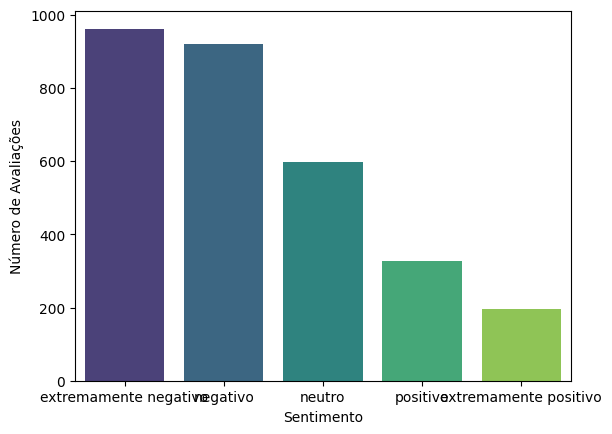

In [232]:
# Contar as avaliações por score
sentiment_counts = df.sentiment.value_counts()

# Plotar as contagens por sentimento
sns.barplot(x=class_names, y=sentiment_counts.values, palette="viridis")

plt.xlabel("Sentimento")
plt.ylabel("Número de Avaliações")

In [233]:
base_name = os.path.splitext(dataset_name)[0]

df.to_csv(
    f"{base_name}_limpeza_demojize.csv", index=False, header=True, encoding="utf-8"
)